src:
- https://www.youtube.com/watch?v=jztwpsIzEGc
- https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb

# Dependencies and Setup

In [273]:
import tensorflow as tf

In [274]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [275]:
tf.config.list_physical_devices('GPU')

[]

# Load Data

In [276]:
import numpy as np
from matplotlib import pyplot as plt

In [277]:
path = "../../Database/images"
data = tf.keras.utils.image_dataset_from_directory(path)
class_names = data.class_names

Found 2784 files belonging to 22 classes.


In [278]:
data_iterator = data.as_numpy_iterator()

In [279]:
batch = data_iterator.next()

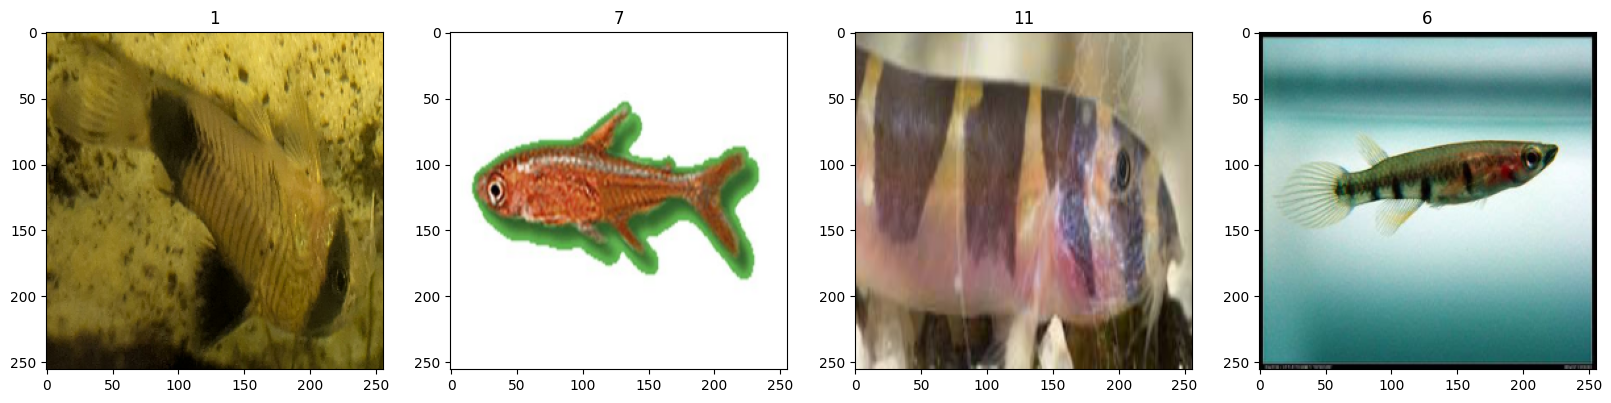

In [280]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [281]:
data = data.map(lambda x,y: (x/255, y))

In [282]:
data.as_numpy_iterator().next()

(array([[[[5.09803928e-02, 5.09803928e-02, 5.09803928e-02],
          [5.09803928e-02, 5.09803928e-02, 5.09803928e-02],
          [5.09803928e-02, 5.09803928e-02, 5.09803928e-02],
          ...,
          [5.09803928e-02, 5.49019612e-02, 6.27451017e-02],
          [5.09803928e-02, 5.49019612e-02, 6.27451017e-02],
          [5.09803928e-02, 5.49019612e-02, 6.27451017e-02]],
 
         [[5.09803928e-02, 5.09803928e-02, 5.09803928e-02],
          [5.09803928e-02, 5.09803928e-02, 5.09803928e-02],
          [5.09803928e-02, 5.09803928e-02, 5.09803928e-02],
          ...,
          [5.09803928e-02, 5.49019612e-02, 6.27451017e-02],
          [5.09803928e-02, 5.49019612e-02, 6.27451017e-02],
          [5.09803928e-02, 5.49019612e-02, 6.27451017e-02]],
 
         [[5.09803928e-02, 5.09803928e-02, 5.09803928e-02],
          [5.09803928e-02, 5.09803928e-02, 5.09803928e-02],
          [5.09803928e-02, 5.09803928e-02, 5.09803928e-02],
          ...,
          [5.09803928e-02, 5.49019612e-02, 6.2745

# Split Data

In [283]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [284]:
train_size

60

In [285]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Extract images and labels

In [286]:
train_images = []
train_labels = []

In [287]:
for images, labels in train:
    train_images.append(images.numpy())  # Append image batch
    train_labels.append(labels.numpy())  # Append label batch

In [288]:
# Convert lists to numpy arrays
train_images = np.concatenate(train_images, axis=0)  # Concatenate all batches along the first axis (samples)
train_labels = np.concatenate(train_labels, axis=0)

In [289]:
val_images = []
val_labels = []

In [290]:
for images, labels in val:
    val_images.append(images.numpy())  # Append image batch
    val_labels.append(labels.numpy())  # Append label batch

print("val_labels before concatenation:", val_labels)

val_labels before concatenation: [array([14,  9, 11, 21, 19,  7,  9, 18,  7,  7,  9, 17, 19,  7, 12, 20, 20,
       10,  1,  9,  5, 16, 11, 11, 17, 17,  7, 16,  2, 10, 16,  9],
      dtype=int32), array([10,  9, 15,  9,  9, 10, 10, 16,  9,  3, 20,  7, 13, 11, 12, 15, 10,
        2,  9, 19, 11, 18, 16, 12, 11,  2,  6,  9, 20,  9,  6,  3],
      dtype=int32), array([10, 15, 21,  3, 13, 17,  5, 16,  9,  6, 16,  6,  8,  1, 11, 21, 18,
        3, 15,  2, 16, 17,  7,  0,  4,  9, 11, 11, 19, 14, 19,  9],
      dtype=int32), array([14, 12,  4,  9,  8,  5,  9,  2,  7, 16, 16, 14, 18,  5, 14,  5, 20,
       16,  6,  7, 11, 12, 11,  4, 13,  5,  5, 16,  1,  9, 11, 16],
      dtype=int32), array([14,  9, 20,  5,  4, 13, 11,  5, 14,  2, 13, 20, 11,  3, 12,  9, 11,
       13,  6, 14,  3,  1,  4, 15,  9,  1,  6,  9, 18, 14, 21,  4],
      dtype=int32), array([10, 11, 16,  9,  7,  0,  5, 10,  6, 17, 18, 10,  4,  6,  7,  7,  7,
        6,  0,  4,  7, 20, 16,  6, 11,  1, 18, 21, 18,  9, 12,  9],
      dt

In [291]:
# Convert lists to numpy arrays
val_images = np.concatenate(val_images, axis=0)  # Concatenate all batches along the first axis (samples)
val_labels = np.concatenate(val_labels, axis=0)

# Build Deep Learning Model

In [292]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [293]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [294]:
model = Sequential()

In [295]:
# First convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Second convolutional layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Third convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))

# Output layer for 22 classes
model.add(Dense(22, activation='softmax'))

In [296]:
from tensorflow.keras.utils import to_categorical

In [297]:
# One-hot encode the labels
# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=22)
val_labels_one_hot = to_categorical(val_labels, num_classes=22)

# Check shapes of the data
print("train_images shape:", train_images.shape)  # (num_train_samples, height, width, channels)
print("train_labels_one_hot shape:", train_labels_one_hot.shape)  # (num_train_samples, 22)
print("val_images shape:", val_images.shape)  # (num_val_samples, height, width, channels)
print("val_labels_one_hot shape:", val_labels_one_hot.shape)  # (num_val_samples, 22)

train_images shape: (1920, 256, 256, 3)
train_labels_one_hot shape: (1920, 22)
val_images shape: (544, 256, 256, 3)
val_labels_one_hot shape: (544, 22)


In [298]:
# Compile the model with categorical crossentropy
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [299]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,702,022 (14.12 MB)

 Trainable params: 3,702,022 (14.12 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [300]:
logdir='logs'

In [301]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [302]:
hist = model.fit(train_images, train_labels_one_hot, epochs=10,
                 validation_data=(val_images, val_labels_one_hot),
                 callbacks=[tensorboard_callback])


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 24s 385ms/step - accuracy: 0.1032 - loss: 3.0166 - val_accuracy: 0.2574 - val_loss: 2.5803
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 379ms/step - accuracy: 0.3158 - loss: 2.3024 - val_accuracy: 0.4118 - val_loss: 1.9900
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 375ms/step - accuracy: 0.6246 - loss: 1.3168 - val_accuracy: 0.5147 - val_loss: 1.8147
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 379ms/step - accuracy: 0.8442 - loss: 0.6134 - val_accuracy: 0.5368 - val_loss: 2.0878
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 378ms/step - accuracy: 0.9387 - loss: 0.2697 - val_accuracy: 0.5551 - val_loss: 2.2908
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 378ms/step - accuracy: 0.9604 - loss: 0.1599 - val_accuracy: 0.5515 - val_loss: 2.5598
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 378ms/step - accuracy: 0.9867 - loss: 0.0698 - val_accuracy: 0.5478 - val_loss: 2.7337
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 380ms/step - accuracy: 0.9954 - loss: 0.0584 - val_accu

# Plot Performance

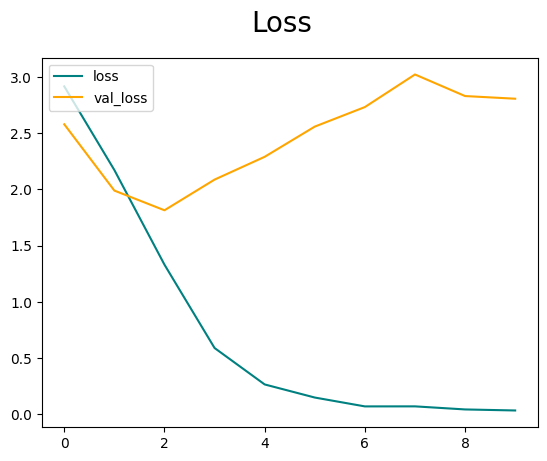

In [303]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

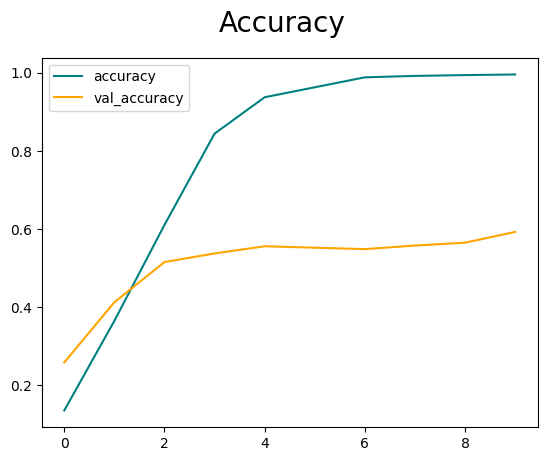

In [304]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [305]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [306]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [307]:
# Iterate over test dataset
for batch in test.as_numpy_iterator():
    X, y = batch

    # Ensure `y` is one-hot encoded
    y_one_hot = to_categorical(y, num_classes=22)  # Convert labels to one-hot

    # Get model predictions
    yhat = model.predict(X)

    # Update metrics
    pre.update_state(y_one_hot, yhat)  # Use one-hot encoded labels
    re.update_state(y_one_hot, yhat)   # Use one-hot encoded labels
    acc.update_state(y_one_hot, yhat)  # Use one-hot encoded labels

# Print final metric values
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Precision: 0.5299145579338074
Recall: 0.484375
Accuracy: 0.50390625


# Test

In [308]:
import cv2

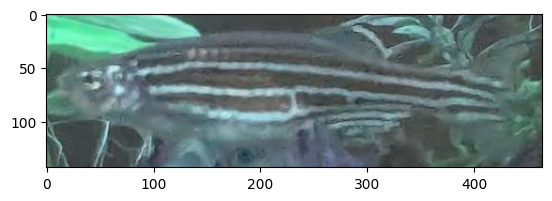

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted class is(Danio_rerio): Danio_rerio


In [309]:
img = cv2.imread('test_pictures/Danio_rerio.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Danio_rerio): {class_names[predicted_class]}')

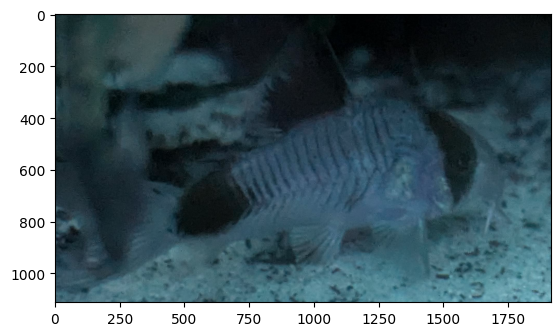

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class is(Corydoras_Panda): Epiplatys_dageti


In [310]:
img = cv2.imread('test_pictures/Corydoras_Panda.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Corydoras_Panda): {class_names[predicted_class]}')

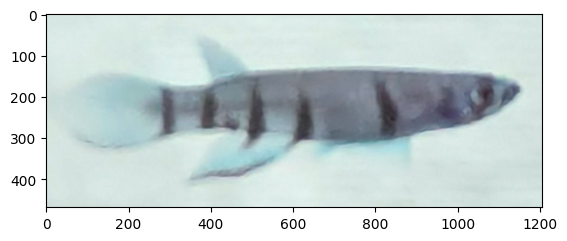

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class is(Epiplatys_dageti): Epiplatys_dageti


In [311]:
img = cv2.imread('test_pictures/Epiplatys_dageti.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Epiplatys_dageti): {class_names[predicted_class]}')

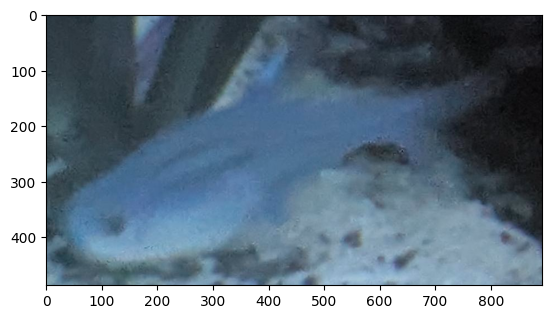

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class is(Hyphessobrycon_amandae): Corydoras_paleatus


In [312]:
img = cv2.imread('test_pictures/Hyphessobrycon_amandae.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Hyphessobrycon_amandae): {class_names[predicted_class]}')

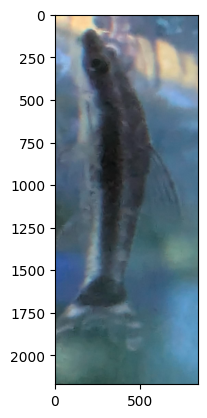

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class is(Otocinclus_affinis): Hyphessobrycon_amandae


In [313]:
img = cv2.imread('test_pictures/Otocinclus_affinis.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Otocinclus_affinis): {class_names[predicted_class]}')

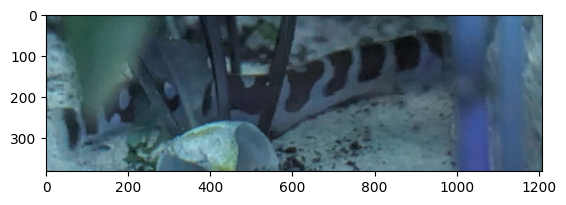

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class is(Pangio_kuhlii): Sewellia_lineolata


In [314]:
img = cv2.imread('test_pictures/Pangio_kuhlii.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Pangio_kuhlii): {class_names[predicted_class]}')

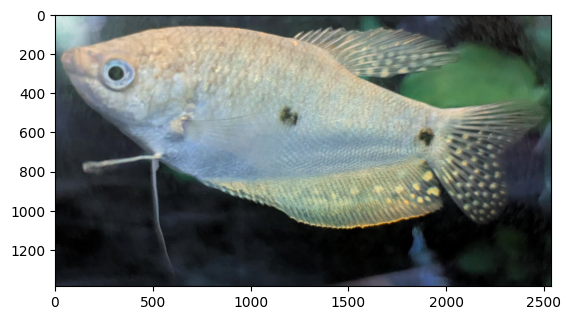

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class is(Trichogaster_trichopterus): Corydoras_paleatus


In [315]:
img = cv2.imread('test_pictures/Trichogaster_trichopterus.jpg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Trichogaster_trichopterus): {class_names[predicted_class]}')

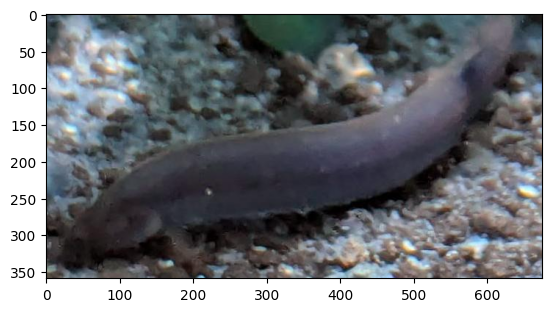

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class is(Pangio_pangia): Pangio_pangia


In [316]:
img = cv2.imread('test_pictures/Pangio_pangia.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Pangio_pangia): {class_names[predicted_class]}')

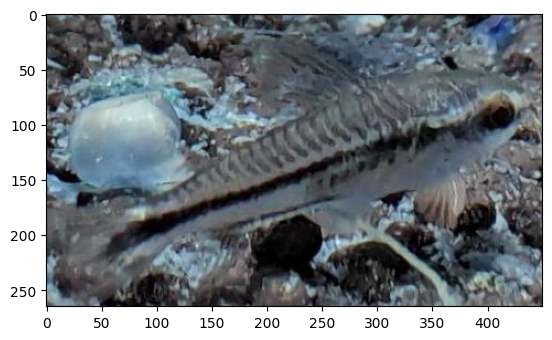

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class is(Corydoras_pygmaeus): Crossocheilus_reticulatus


In [317]:
img = cv2.imread('test_pictures/Corydoras_pygmaeus.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is(Corydoras_pygmaeus): {class_names[predicted_class]}')

# Save the Model